In [110]:
# Cell 1: Import necessary libraries
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import cv2


In [111]:
# Cell 2: Constants and ImageDataGenerator setup
ANGER_DIR = r'D:\SIM\level 3\advanced multimedia\final project\CK+48\0'      # Use the anger directory
CONTEMPT_DIR = r'D:\SIM\level 3\advanced multimedia\final project\CK+48\1'   # Use the contempt directory
DISGUST_DIR = r'D:\SIM\level 3\advanced multimedia\final project\CK+48\2'    # Use the disgust directory
FEAR_DIR =r'D:\SIM\level 3\advanced multimedia\final project\CK+48\3'        #use this fear directory
HAPPY_DIR =r'D:\SIM\level 3\advanced multimedia\final project\CK+48\4'       #use this happy directory
SADNESS_DIR =r'D:\SIM\level 3\advanced multimedia\final project\CK+48\5'     #use this sadness directory
SURPRISE_DIR=r'D:\SIM\level 3\advanced multimedia\final project\CK+48\6'     #use this surprise directory
IMAGE_SIZE = 32                     # Reduced image size
BATCH_SIZE = 32                     # Reduced batch size

# Using ImageDataGenerator for loading and augmenting the images
ANGER_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

CONTEMPT_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

DUSGUST_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

FEAR_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

HAPPY_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

SADNESS_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

SURPRISE_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')




validation_datagen = ImageDataGenerator(rescale=1./255)

ANGER_generator = ANGER_datagen.flow_from_directory(
    ANGER_DIR,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical')

CONTEMPTidation_generator = CONTEMPT_datagen.flow_from_directory(
    CONTEMPT_DIR,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical')

DUSGUST_generator = DUSGUST_datagen.flow_from_directory(
    DISGUST_DIR,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical')

FEAR_generator = FEAR_datagen.flow_from_directory(
    FEAR_DIR,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical')

HAPPY_generator = HAPPY_datagen.flow_from_directory(
    HAPPY_DIR,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical')

SADNESS_generator = SADNESS_datagen.flow_from_directory(
    SADNESS_DIR,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical')

SURPRISE_generator = SURPRISE_datagen.flow_from_directory(
    SADNESS_DIR,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical')


Found 135 images belonging to 1 classes.
Found 54 images belonging to 1 classes.
Found 177 images belonging to 1 classes.


Found 75 images belonging to 1 classes.
Found 207 images belonging to 1 classes.
Found 84 images belonging to 1 classes.
Found 84 images belonging to 1 classes.


In [120]:
# Cell 3: Model Definition and Compilation
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))  # Reduced to 512 neurons
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))  # 7 classes for emotions

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 30, 30, 64)        640       
                                                                 
 conv2d_33 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 14, 14, 128)       0         
 ng2D)                                                           
                                                                 
 dropout_24 (Dropout)        (None, 14, 14, 128)       0         
                                                                 
 conv2d_34 (Conv2D)          (None, 12, 12, 128)       147584    
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 6, 6, 128)         0         
 ng2D)                                                

In [ ]:
# Cell 4: Training with Early Stopping
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Train the model
history = model.fit(
    ANGER_generator,
    steps_per_epoch=ANGER_generator.n // BATCH_SIZE,
    epochs=10,  # Increase the maximum number of epochs
    validation_data=CONTEMPTidation_generator,
    validation_steps=CONTEMPTidation_generator.n // BATCH_SIZE,
    callbacks=[early_stopping])

history = model.fit(
    CONTEMPTidation_generator,
    steps_per_epoch=CONTEMPTidation_generator.n // BATCH_SIZE,
    epochs=10,  # Increase the maximum number of epochs
    validation_data=DUSGUST_generator,
    validation_steps=DUSGUST_generator.n // BATCH_SIZE,
    callbacks=[early_stopping])

history = model.fit(
    DUSGUST_generator,
    steps_per_epoch=DUSGUST_generator.n // BATCH_SIZE,
    epochs=10,  # Increase the maximum number of epochs
    validation_data=FEAR_generator,
    validation_steps=FEAR_generator.n // BATCH_SIZE,
    callbacks=[early_stopping])

history = model.fit(
    FEAR_generator,
    steps_per_epoch=FEAR_generator.n // BATCH_SIZE,
    epochs=10,  # Increase the maximum number of epochs
    validation_data=HAPPY_generator,
    validation_steps=HAPPY_generator.n // BATCH_SIZE,
    callbacks=[early_stopping])

history = model.fit(
    HAPPY_generator,
    steps_per_epoch=HAPPY_generator.n // BATCH_SIZE,
    epochs=10,  # Increase the maximum number of epochs
    validation_data=SADNESS_generator,
    validation_steps=SADNESS_generator.n // BATCH_SIZE,
    callbacks=[early_stopping])

history = model.fit(
    SADNESS_generator,
    steps_per_epoch=SADNESS_generator.n // BATCH_SIZE,
    epochs=10,  # Increase the maximum number of epochs
    validation_data=SURPRISE_generator,
    validation_steps=SURPRISE_generator.n // BATCH_SIZE,
    callbacks=[early_stopping])


In [114]:
# save the model
model.save("./model_file.h5")

In [115]:
#load the saved model
from keras.models import load_model

# Load the modela
loaded_model = load_model("./model_file.h5")


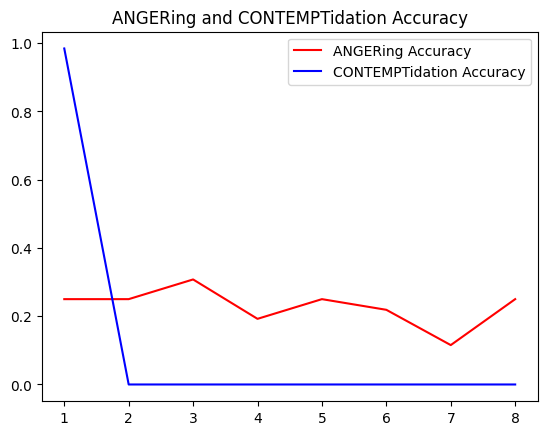

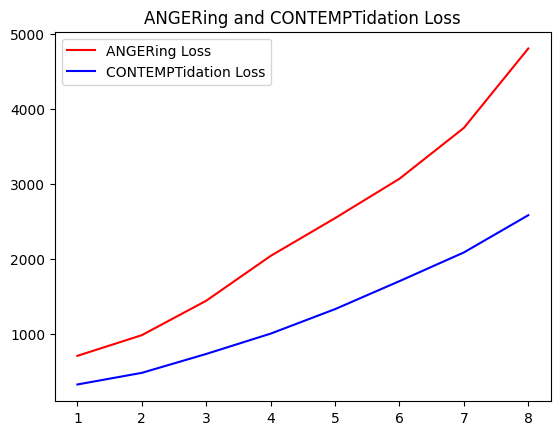

In [116]:
# Plot ANGERing and CONTEMPTidation accuracy
acc = history.history['accuracy']
CONTEMPT_acc = history.history['val_accuracy']
loss = history.history['loss']
CONTEMPT_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='ANGERing Accuracy')
plt.plot(epochs, CONTEMPT_acc, 'b', label='CONTEMPTidation Accuracy')
plt.title('ANGERing and CONTEMPTidation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='ANGERing Loss')
plt.plot(epochs, CONTEMPT_loss, 'b', label='CONTEMPTidation Loss')
plt.title('ANGERing and CONTEMPTidation Loss')
plt.legend()

plt.show()


In [117]:
# Evaluate the model on validation data
val_loss, val_acc = model.evaluate(CONTEMPTidation_generator)
print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')

2/2 [==============================] - 0s 18ms/step - loss: 311.4311 - accuracy: 0.9630
Validation Loss: 311.4311, Validation Accuracy: 0.9630


In [119]:
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
import numpy as np

# Path to the new image you want to predict
new_image_path = r"D:\SIM\level 3\advanced multimedia\final project\ck\CK+48\fear\S011_003_00000013.png"


# Load and preprocess the image
img = image.load_img(new_image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE), grayscale=True)
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values

# Use the loaded model for prediction
predictions = model.predict(img_array)

# Assuming your model has 7 output classes for emotions
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sadness', 'Surprise', 'contempt']

# Get the predicted emotion label
predicted_emotion_index = np.argmax(predictions)
predicted_emotion_label = emotion_labels[predicted_emotion_index]

print(f"Predicted Emotion: {predicted_emotion_label}")


1/1 [==============================] - 0s 20ms/step
Predicted Emotion: Angry
